# Обробка сигналів - лабораторна робота 1
Виконав: Басистий Олег

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, unit_impulse, freqz

## Завдання 1

Згадаємо формулу різницевого рівняння ЛДС:
$$y[n] = b_0 x[n] + b_1 x[n-1] + \ldots + b_{N-1} x\!\left[n-(N-1)\right]
- a_1 y[n-1] - a_2 y[n-2] - \ldots - a_{M-1} y\!\left[n-(M-1)\right]$$



Наша система задається, як 
$$y[n] + \frac{(D_1 + D_2)}{140} y[n-1] + \frac{(P_2 - D_2)}{130} y[n-2] 
- \frac{D_1}{150} y[n-4] - \frac{(M_1 - D_1)}{150} y[n-5]
$$
$$
= \frac{M_1}{10} x[n] + \frac{(P_3 - D_2)}{20} x[n-1] 
- \frac{(M_2 - M_1)}{20} x[n-2] - \frac{P_4}{30} x[n-3] 
+ \frac{D_2}{20} x[n-4] - \frac{M_2}{20} x[n-5]
$$

Тоді, вектори коефіцієнтів a, b є наступними:
$$ a = [1, {D_1 + D_2\over{140}}, {(P_2 - D_2)\over{130}}, 0, -{D_1\over{150}}, {D_1 - M_1\over{150}}], $$
$$ b = [{M_1 \over 10}, {P_3 - D_2\over 20}, {M_1 - M_2\over20}, -{P_4 \over 30}, {D_2\over{20}}, - {M_2\over 20}]

За допомогою наступної клітинки, можна розраховувати коефіцієнти системи для будь-яких днів народжень.

In [147]:
bday = "12.04.2006"

def get_coeffs(bday):
    D_1 = int(bday[0])
    D_2 = int(bday[1])
    M_1 = int(bday[3])
    M_2 = int(bday[4])
    P_1 = int(bday[6])
    P_2 = int(bday[7])
    P_3 = int(bday[8])
    P_4 = int(bday[9])

    a = [1, (D_1 + D_2)/140, (P_2 - D_2)/130, 0, -D_1/150, (D_1 - M_1)/150]
    b = [M_1 / 10, (P_3 - D_2)/20, (M_1 - M_2)/20, -P_4 / 30, D_2/20, - M_2/20]
    
    return a, b

a, b = get_coeffs(bday)

print(f"""{a=}\n{b=}""")

a=[1, 0.02142857142857143, -0.015384615384615385, 0, -0.006666666666666667, 0.006666666666666667]
b=[0.0, -0.1, -0.2, -0.2, 0.1, -0.2]


## Завдання 2

In [148]:
fs = 256
T = 1
f = 10
A = 1
t = np.arange(0, T, 1 / fs) 
x = A * np.sin(2 * np.pi * f * t)

In [149]:
y_zero = lfilter(b, a, x)

In [150]:
zi = np.random.rand(max(len(a), len(b)) - 1)
y_rand = lfilter(b, a, x, zi=zi)[0]

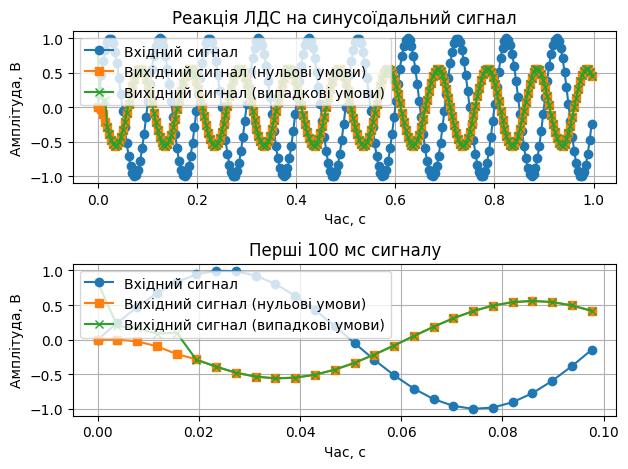

In [151]:
plt.subplot(2,1,1)
plt.plot(t, x, 'o-', label='Вхідний сигнал')
plt.plot(t, y_zero, 's-', label='Вихідний сигнал (нульові умови)')
plt.plot(t, y_rand, 'x-', label='Вихідний сигнал (випадкові умови)')
plt.title('Реакція ЛДС на синусоїдальний сигнал')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда, В')
plt.grid(True)
plt.legend()

t_100ms = t[t <= 0.1]
x_100ms = x[:len(t_100ms)]
y_zero_100ms = y_zero[:len(t_100ms)]
y_rand_100ms = y_rand[:len(t_100ms)]

plt.subplot(2,1,2)
plt.plot(t_100ms, x_100ms, 'o-', label='Вхідний сигнал')
plt.plot(t_100ms, y_zero_100ms, 's-', label='Вихідний сигнал (нульові умови)')
plt.plot(t_100ms, y_rand_100ms, 'x-', label='Вихідний сигнал (випадкові умови)')
plt.title('Перші 100 мс сигналу')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда, В')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Амплітуда вихідних сигналів менша. Отже, система не підсилює, а послаблює.

## Завдання 3 

In [152]:
def gain(b, a, f, fs):
    x = np.sin(2 * np.pi * f * np.arange(0, 1, 1/fs))
    y = lfilter(b, a, x)
    A_in = (x.max() - x.min())
    A_out = (y.max() - y.min())
    return A_out / A_in if A_in != 0 else np.nan


In [153]:
print(gain(b, a, 10, fs))

0.5589436273517193


## Завдання 4

In [154]:
freqs = [1, 20, 50, 70, 100, 125, 150]
fs = 256
T = 1
A = 1
t = np.arange(0, T, 1 / fs)

In [155]:
gains = []
for f in freqs:
    x = A * np.sin(2 * np.pi * f * t)
    y = lfilter(b, a, x)
    print(f"""f={f} Hz: Gain = {gain(b, a, f, fs)}""")
    gains.append(gain(b, a, f, fs))

f=1 Hz: Gain = 0.5960099705468245
f=20 Hz: Gain = 0.45520535055576206
f=50 Hz: Gain = 0.23682770518419038
f=70 Hz: Gain = 0.340615715787735
f=100 Hz: Gain = 0.3434516423038092
f=125 Hz: Gain = 0.4193303661513369
f=150 Hz: Gain = 0.3577955954487998


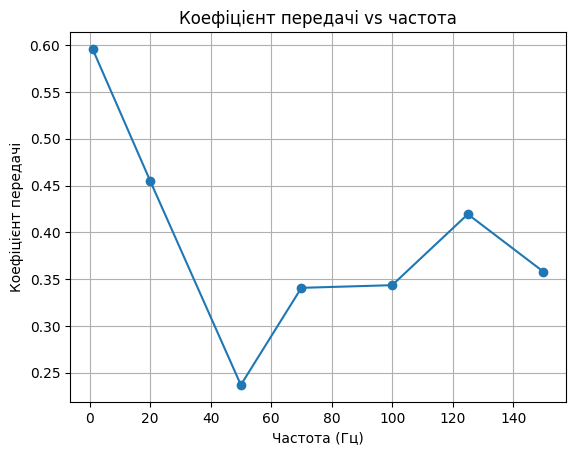

In [156]:
plt.figure()
plt.plot(freqs, gains, marker='o')
plt.title("Коефіцієнт передачі vs частота")
plt.xlabel("Частота (Гц)")
plt.ylabel("Коефіцієнт передачі")
plt.grid(True)
plt.show()

## Завдання 5

In [157]:
f1 = 3
f2 = 20
fs = 256
T = 1
A = 1

t = np.arange(0, T, 1 / fs)

s1 = A * np.sin(2 * np.pi * f1 * t) 
s2 = A * np.sin(2 * np.pi * f2 * t)
s = s1 + s2

In [158]:
y1 = lfilter(b, a, s1)
y2 = lfilter(b, a, s2)
y = lfilter(b, a, s)

Перевіримо адитивність системи. Використовуємо метод, який порівнює до якоїсь похибки, оскільки існують відхилення через природу FP чисел. 

In [159]:
np.testing.assert_allclose(y, y1 + y2, rtol=1e-010, atol=0)

Перевіримо однорідність системи.

In [160]:
y1_scaled = lfilter(b, a, 3 * s1)
np.testing.assert_allclose(3 * y1, y1_scaled, rtol=1e-010, atol=0)

todo plots

## Завдання 6

In [161]:
N = 30

x = unit_impulse(N)
y = lfilter(b, a, x)


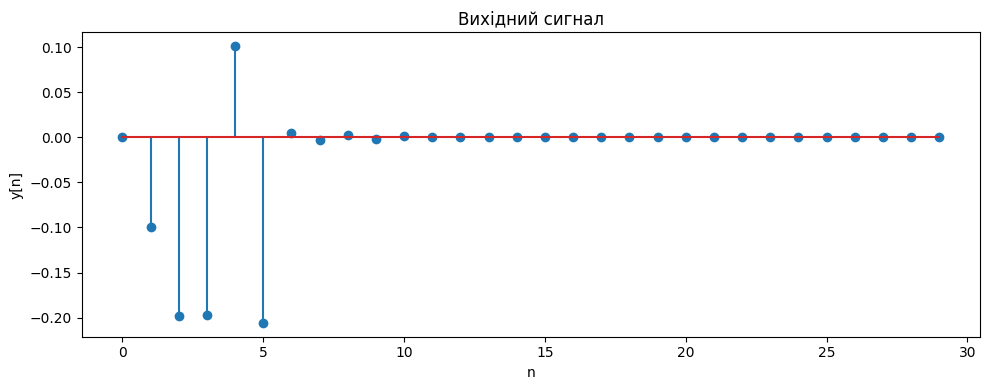

In [162]:
plt.figure(figsize=(10,4))

plt.stem(y)
plt.title('Вихідний сигнал')
plt.xlabel('n')
plt.ylabel('y[n]')

plt.tight_layout()
plt.show()

## Завдання 8

In [163]:
fs = 256
T = 1
f = 10
A = 1
t = np.arange(0, T, 1 / fs) 
x = A * np.sin(2 * np.pi * f * t)

In [164]:
h = lfilter(b, a, unit_impulse(512))
y = np.convolve(x, h)[:len(x)]

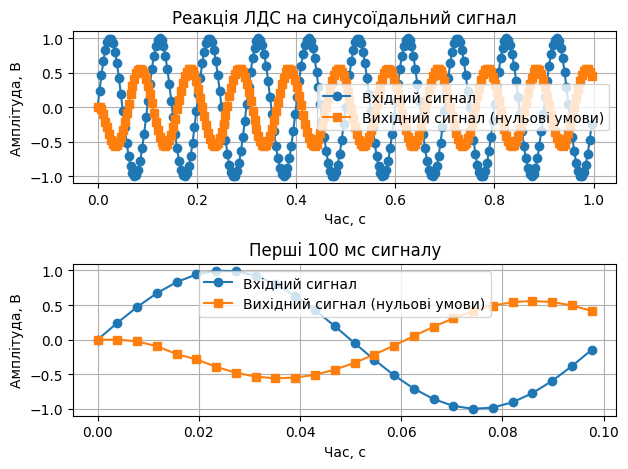

In [165]:
plt.subplot(2,1,1)
plt.plot(t, x, 'o-', label='Вхідний сигнал')
plt.plot(t, y, 's-', label='Вихідний сигнал (нульові умови)')
plt.title('Реакція ЛДС на синусоїдальний сигнал')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда, В')
plt.grid(True)
plt.legend()

t_100ms = t[t <= 0.1]
x_100ms = x[:len(t_100ms)]
y_100ms = y[:len(t_100ms)]

plt.subplot(2,1,2)
plt.plot(t_100ms, x_100ms, 'o-', label='Вхідний сигнал')
plt.plot(t_100ms, y_100ms, 's-', label='Вихідний сигнал (нульові умови)')
plt.title('Перші 100 мс сигналу')
plt.xlabel('Час, с')
plt.ylabel('Амплітуда, В')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [166]:
y_lfilter = lfilter(b, a, x)
np.testing.assert_allclose(y, y_lfilter, rtol=1e-010, atol=0)

## Завдання 9

In [167]:
fs = 256
N = 100
w, h = freqz(b, a, worN=N, fs=fs)

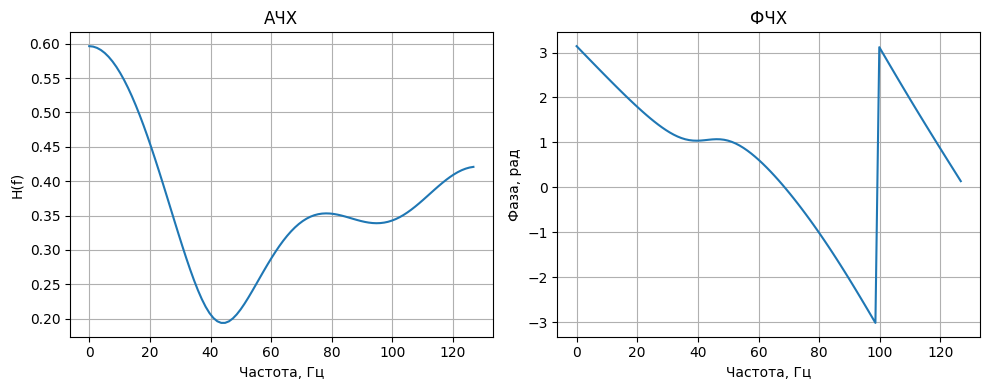

In [168]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(w, np.abs(h))
plt.title("АЧХ")
plt.xlabel("Частота, Гц")
plt.ylabel("H(f)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(w, np.angle(h))
plt.title("ФЧХ")
plt.xlabel("Частота, Гц")
plt.ylabel("Фаза, рад")
plt.grid(True)

plt.tight_layout()
plt.show()

In [169]:
w = 2 * np.pi * np.array(freqs) / fs
_, h = freqz(b, a, worN=w)

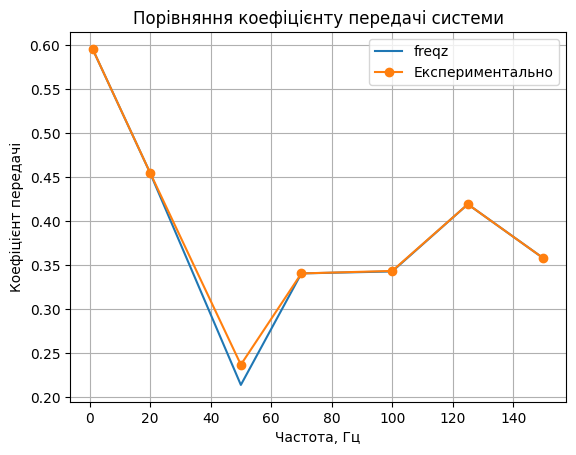

In [170]:
gains_freqz = np.abs(h)

plt.plot(freqs, gains_freqz, label="freqz")
plt.plot(freqs, gains, 'o-', label='Експериментально')
plt.title("Порівняння коефіцієнту передачі системи")
plt.xlabel("Частота, Гц")
plt.ylabel("Коефіцієнт передачі")
plt.grid(True)
plt.legend()
plt.show()

In [171]:

fs = 256
w, h = freqz(b, a, worN=N, fs=fs)
gain = np.abs(h)

amplifying = gain > 1
freqs_amplify = w[amplifying]

if len(freqs_amplify) > 0:
    start = freqs_amplify[0]
    intervals = []
    for i in range(1, len(freqs_amplify)):
        if freqs_amplify[i] - freqs_amplify[i-1] > (fs/N):  # розрив
            end = freqs_amplify[i-1]
            intervals.append((start, end))
            start = freqs_amplify[i]
    intervals.append((start, freqs_amplify[-1]))
else:
    intervals = []

In [172]:
print(intervals)

[]
